# Arithmetic Operations on Images

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
x=np.uint8([250])
y=np.uint8([10])

In [3]:
print(cv2.add(x,y)) 

[[255]]


In [4]:
print(x+y)

[4]


## Image Blending

In [5]:
img1=cv2.imread('ml.jpg')
img2=cv2.imread('opencv_logo.png')
print(img1.shape)
print(img2.shape)

(250, 200, 3)
(250, 200, 3)


In [6]:
dst = cv2.addWeighted(img1,0.5,img2,0.5,0)

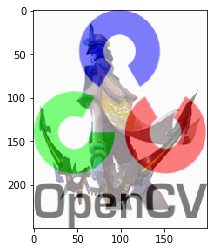

In [7]:
plt.imshow(dst)

### Image Blending with trackbar

In [8]:
def nothing(x):
    pass

cv2.namedWindow('image')
cv2.createTrackbar('w','image',0,100,nothing)

while(1):
    cv2.imshow('image',dst)
    k=cv2.waitKey(1)&0xFF
    if k==27:
        break
        
    # get current positions of four trackbars
    w=cv2.getTrackbarPos('w','image')
    dst = cv2.addWeighted(img1,w/100.,img2,1.-w/100.,0)
        
cv2.destroyAllWindows()

## Bitwise Operations

In [9]:
# Load two images
img1=cv2.imread('messi.jpg')
img2=cv2.imread('opencv_logo.png')

# I want to put logo on top-left corner, So I create a ROI
rows,cols,channels=img2.shape
roi=img1[0:rows,0:cols ]

# Now create a mask of logo and create its inverse mask also
img2gray=cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
ret, mask=cv2.threshold(img2gray,10,255, cv2.THRESH_BINARY)
mask_inv=cv2.bitwise_not(mask)

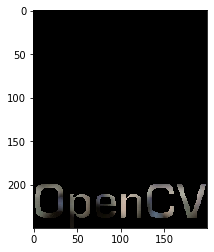

In [10]:
# Now black-out the area of logo in ROI
img1_bg=cv2.bitwise_and(roi,roi,mask=mask_inv)
plt.imshow(img1_bg)

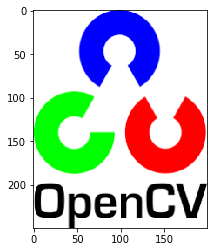

In [11]:
# Take only region of logo from logo image.
img2_fg=cv2.bitwise_and(img2,img2,mask=mask)
plt.imshow(img2_fg)

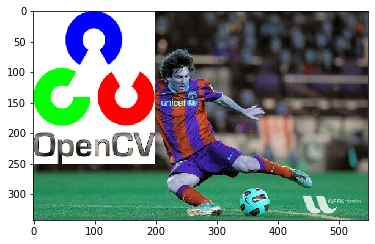

In [12]:
# Put logo in ROI and modify the main image
dst=cv2.add(img1_bg,img2_fg)
img1[0:rows,0:cols ]=dst

plt.imshow(img1)

### From the class

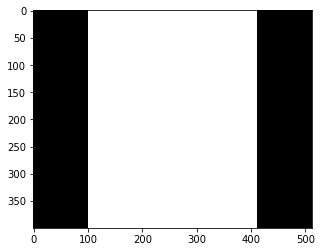

In [13]:
img = np.zeros((400,512,3),np.uint8)
for i in range(255):
    img[:,i]=i
    img[:,256+i] = 255-i

ret, mask=cv2.threshold(img,100,255, cv2.THRESH_BINARY)
plt.imshow(mask)

#### With taskbar

In [15]:
img = np.zeros((400,512,3),np.uint8)
for i in range(255):
    img[:,i]=i
    img[:,256+i] = 255-i

ret, mask=cv2.threshold(img,100,255, cv2.THRESH_BINARY)

def nothing(x):
    pass

cv2.namedWindow('image')
cv2.createTrackbar('b','image',0,250,nothing)
cv2.createTrackbar('c','image',0,255,nothing)

while(1):
    cv2.imshow('image',mask)
    k=cv2.waitKey(1)&0xFF
    if k==27:
        break
        
    # get current positions of four trackbars
    b=cv2.getTrackbarPos('b','image')
    c=cv2.getTrackbarPos('c','image')
    ret, mask=cv2.threshold(img,b,c, cv2.THRESH_BINARY)
        
cv2.destroyAllWindows()